In [1]:
pip install tensorflow

In [2]:

# 1- load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

In [3]:
# 2- load dataset
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# 3- separate train val and test dataset
X_train=x_train[0:10000]
Y_train=to_categorical(y_train[0:10000],10) # one-hot encoding

X_val=x_train[20000:30000]
Y_val=to_categorical(y_train[20000:30000],10)

X_test=x_test
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


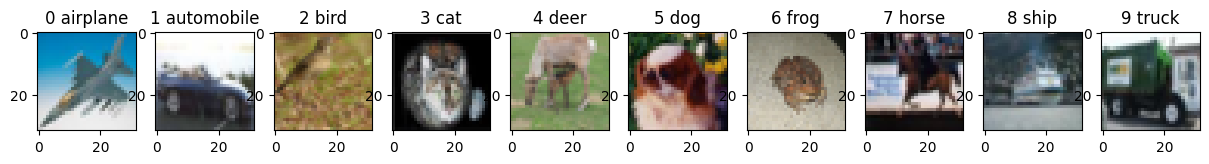

In [5]:
# 4- sample image of each label

labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])

plt.figure(figsize=(15,15))

for i in range(0,len(np.unique(np.argmax(Y_train,axis=1)))):
    rmd=np.random.choice(np.where(np.argmax(Y_train,axis=1)==i)[0],1)
    plt.subplot(1,10,i+1)
    img=X_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(str(np.argmax(Y_train,axis=1)[rmd][0]) + " " + labels[i])

In [6]:
# 5- check the shape of the data
X_train.shape  ,  Y_train.shape  ,  X_val.shape  ,  Y_val.shape

((10000, 32, 32, 3), (10000, 10), (10000, 32, 32, 3), (10000, 10))

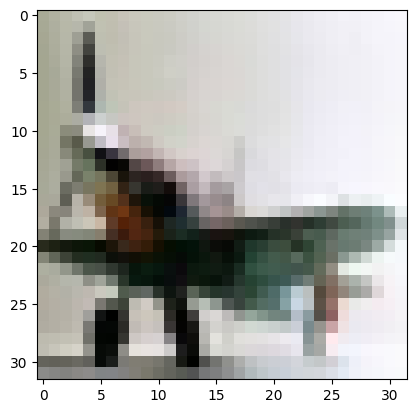

In [7]:
# 6-
plt.imshow(X_train[6663])

In [8]:
# 7-
Y_train[:5] #2d

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
# 8-
Y_train = Y_train.reshape(-1, ) #1d
Y_train[:5]

array([0., 0., 0., 0., 0.])

In [10]:
# 9-
classes = ('airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [11]:
classes[0]

'airplane'